#  <font color='greem'>HomeWork 5 <fonr color>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [6]:
#Part-A

up=7
down=1

int1= np.random.randint(down, up)
int2= np.random.randint(down, up)
print(int1, int2)

5 1


In [8]:
#Part-B

up=7
down=1
N=1000000
counter=0

for i in range(N):
    int1= np.random.randint(down, up)
    int2= np.random.randint(down, up)
    if(int1==6 and int2==6):
        counter+=1
        
        
prob=counter/N

print(prob)
    
#The answer is close to 1/36

0.027833


### Q2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
import random

In [12]:
t_Bi=46*60
t_Tl=2.2*60
t_Pb=3.3*60
particle=10000
time=20000

n_Bi=particle
Bi213=[particle]

n_Tl=0
Tl209=[0]

n_Pb=0
Pb209=[0]

n_Bi209=0
Bi209=[0]

for i in range(1,time):
    #Pb-209
    P_Pb=1-2**(-i/t_Pb)
    N_Pb=int(1/P_Pb)
    decay=0
    for j in range(n_Pb):
        x=np.random.uniform(0,N_Pb)
        if(x<=1):
            decay+=1
    n_Pb-=decay
    n_Bi209+=decay
    
    #Tl-209
    P_Tl=1-2**(-i/t_Tl)
    N_Tl=int(1/P_Tl)
    decay=0
    for k in range(n_Tl):
        x=np.random.uniform(0,N_Tl)
        if(x<=1):
            decay+=1
    n_Tl-=decay
    n_Pb+=decay
    
    #Bi-213
    P_Bi=1-2**(-i/t_Bi)
    N_Bi=int(1/P_Bi)
    decay_Pb=0
    decay_Tl=0
    for l in range(n_Bi):
        x=np.random.uniform(0,N_Bi)
        decay=1
        if(x<=1):
            decay+=1
            y=np.random.uniform(0,100)
            if(y<2.09):
                decay_Tl+=1
            else:
                decay_Pb+=1
    n_Bi-=(decay_Pb+decay_Tl)
    n_Pb+=decay_Pb
    n_Tl+=decay_Tl
    
    Tl209.append(n_Tl)
    Pb209.append(n_Pb)
    Bi209.append(n_Bi209)
    Bi213.append(n_Bi)

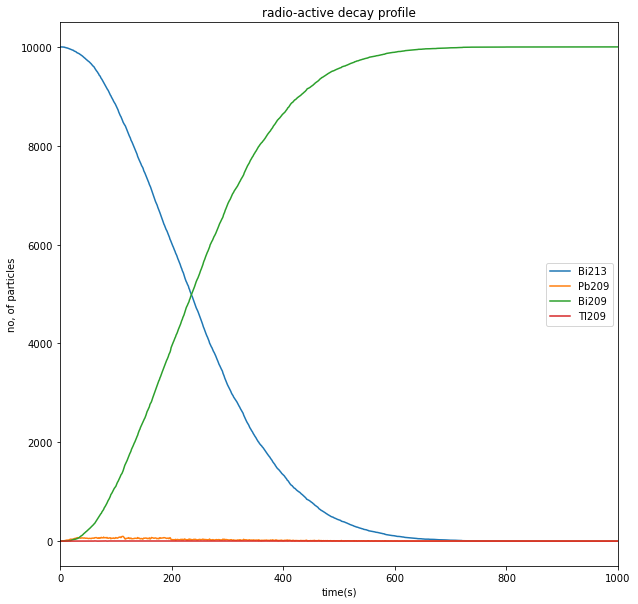

In [15]:
t=np.arange(0, time, 1)

plt.figure(figsize=(10,10))
plt.plot(t, Bi213, label='Bi213')
plt.plot(t, Pb209, label='Pb209')
plt.plot(t, Bi209, label='Bi209')
plt.plot(t, Tl209, label='Tl209')
plt.legend()
plt.xlim(0,1000)
plt.xlabel('time(s)')
plt.ylabel('no, of particles')
plt.title('radio-active decay profile')
plt.show()

### Q3

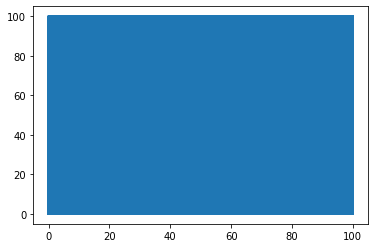

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath


#N is the number of walks and L is the grid size.
def randomwalk(N,L):
    x=[50]
    y=[50]
    i=50
    j=50
    
    for k in range(N):
        p=np.random.randint(0,4)
        if(p==0):
            i+=1
        if(p==1):
            i-=1
        if(p==2):
            j+=1
        if(p==3):
            j-=1
        i*=np.sign(i)
        j*=np.sign(j)
        if(i>(L-1)):
            i=2*L-2-i
        if(j>(L-1)):
            j=2*L-2-j
        x.append(i)
        y.append(j)
    return x,y
        
N=1000000
L=101
x,y = randomwalk(N,L)
            
            

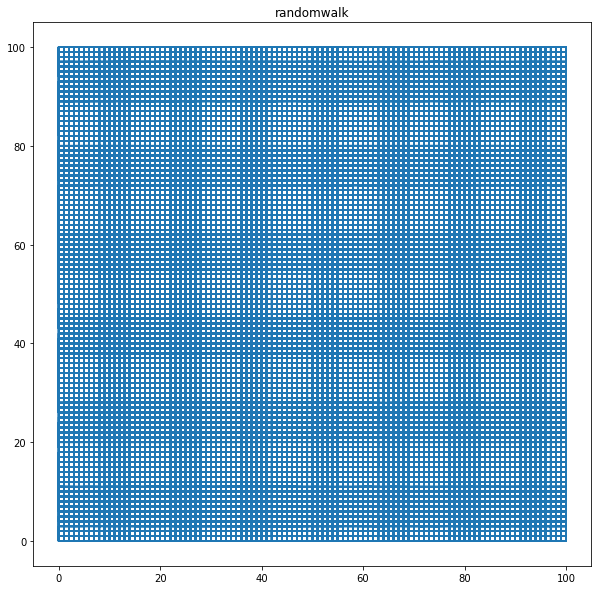

In [12]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.title('randomwalk')
plt.show()

Here we can see that each grid has almost equal probability of being approached. This essentially means the number of steps is so large that the particle visits every corner with almost equal probability. 

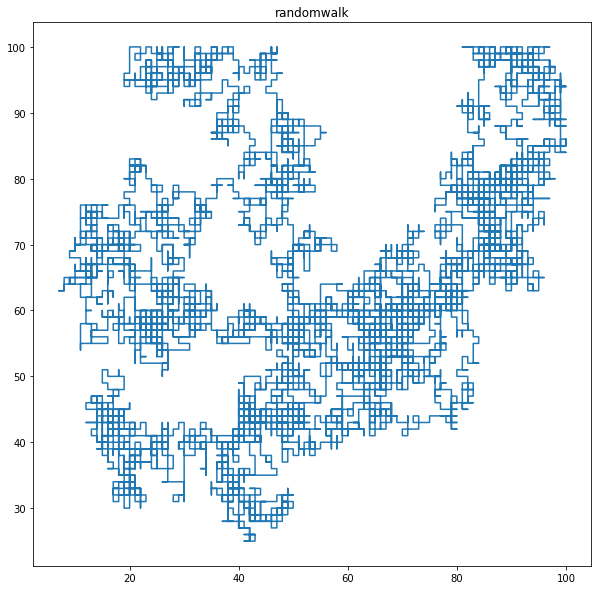

In [19]:
#What about 10000 steps only?

N=10000
L=101
x,y = randomwalk(N,L)
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.title('randomwalk')
plt.show()

### Q4

In [5]:
#defining the function
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from numpy import random as rn


def func(x):
    return math.sin(1/(x*(2-x)))**2
    
#we take 2x1 grid here as done in the class.Area=2

def M_C1(func, xmin, xmax, ymin, ymax, N):
    counter=0
    for i in range(N):
        y=rn.uniform(ymin, ymax)
        x=rn.uniform(xmin, xmax)
        if(y<func(x)):
            counter+=1
    area=(ymax-ymin)*(xmax-xmin)
    return area*(counter/N)

def M_C1_err(func, xmin, xmax, ymin, ymax, N):
    I=M_C1(func, xmin, xmax, ymin, ymax, N)
    A=(xmax-xmin)*(ymax-ymin)
    return math.sqrt(I*(A-I)/N)

print(M_C1(func, 0, 2, 0 , 1, 100000))
print(M_C1_err(func, 0, 2, 0, 1, 100000))

#error
    

1.44904
0.0028116022300460636


In [15]:
#mean value method

def M_C2(f, xmin, xmax, N):
    suum=0
    for i in range(N):
        x=rn.uniform(xmin, xmax)
        suum+=f(x)
    return (xmax-xmin)*suum/N

def M_C2_err(f, xmin, xmax, N):
    suum=0
    sqr=0
    for i in range(N):
        x=rn.uniform(xmin, xmax)
        suum+=f(x)
        sqr+=f(x)**2
    var=-suum**2/N**2+sqr/N
    return (xmax-xmin)*math.sqrt(var/N)

xmin=0
xmax=2
N=1000000

print(M_C2(func, xmin, xmax, N))
print(M_C2_err(func, xmin, xmax, N))
    

1.451639711563732
0.0005272781747188237


The error is lower in case of mean value method.

### Q5

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from numpy.random import uniform as unf
from numpy.random import rand


#D is dimension, N is the number of points, the later indices are the bounds

def I(D, N, xmin, xmax, ymin, ymax):
    sum=0
    for i in range(N):
        x=unf(-1,1,10)
        y=unf(-1,1,10)
        if(np.dot(x,y)<1):
            sum+=1
    return (2**D/N)*(sum)


xmin=-1
xmax=1
ymin=-1
ymax=1
D=10
N=1000000

print(I(D,N,xmin, xmax, ymin, ymax))

849.2472319999999


### Q6

As there is a $1/\sqrt{x}$ term in the numerator which blows up at 0. We have to get rid of this term. So we need to divide by $1/\sqrt{x}$, Now, the normalisation constant in this case will be, 
$$N=\int_0^1 \frac{dx}{\sqrt{x}}= 2$$ which essentially means the distribution will be:

$$w(x)=\frac{1}{2\sqrt{x}}$$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from numpy.random import uniform as unif

In [8]:
# func: functional form
#w: weight factor
#xmin: lower x-bound
#xmax: higher x-bound
#N: number of points

def func(x):
    return 1/(math.sqrt(x)*(math.exp(x)+1))

def w(x):
    return 1/(2*math.sqrt(x)) 

#as the orginal function func diverges at x=0, we take 4 to be the upper limit or ymax. It is just a 
#dummy number chosen based on intuition and convenience. 
def w_mean(func, w, xmin, xmax, ymin, ymax, N):
    i=0
    suum=0
    while(i<N):
        xi=unif(xmin, xmax)
        yi=unif(ymin, ymax)
        if(yi>w(xi)):
            pass
        if(yi<=w(xi)):
            suum+= func(xi)/w(xi)
            i=i+1
    return suum/N

N=1000000
xmin=0
xmax=1
ymin=0
ymax=4

print(w_mean(func, w, xmin, xmax, ymin, ymax, N))
#We get a value of 0.83 which is quite near to that of 0.84

0.8282745820562205


### Q7

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath
from numpy.random import uniform as unif
import random

##### Part-A

In [4]:
def Energy(array, J):
    row=array.shape[0]
    col=array.shape[1]
    suum=0
    for i in range(row-1):
        suum+=np.dot(array[i], array[i+1])
    for j in range(col-1):
        suum+=np.dot(array[:,i], array[:,i+1])
    return -J*suum

##### Part-B,C

Text(0.5, 1.0, 'Magentisation Profile Over time')

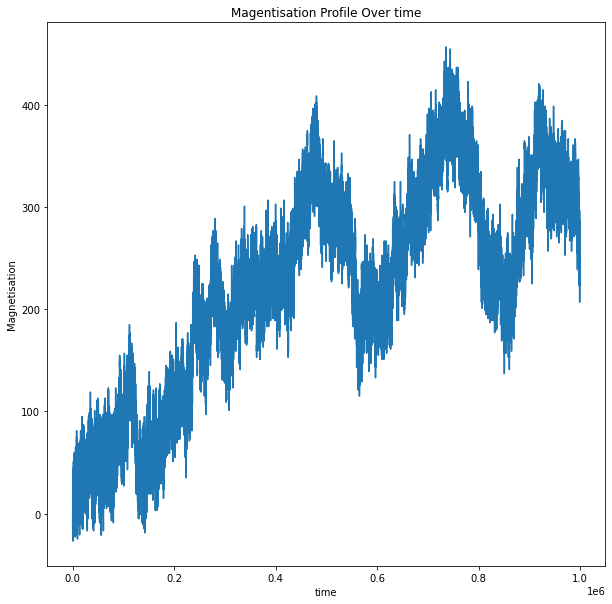

In [5]:
#G: Number of grids
#k_b: Boltzmann Constant
#T: Temperature
#J: Ising model constant
#N: The number of Monte-Carlo steps


#I created a 21x21 grid where the inner 20x20 grid is a matrix of values 1, and -1, chosen randomly for 
#each coordinate. The outer entries are still 0. 
T=1
k_b=1
G=20
J=1
arr=np.zeros([G+1, G+1])
for i in range(1,G):
    for j in range(1,G):
        arr[i][j]=random.choice([-1,1])
M=np.sum(arr)

y=[M]
N=1000000
x=np.arange(0,N+1)
for k in range(N):
    i = np.random.randint(1,G)
    j = np.random.randint(1,G)
    E_int=-arr[i][j]*(arr[i][j-1]+arr[i][j+1]+arr[i-1][j]+arr[i+1][j])
    if(E_int>=0):
        arr[i][j]*=-1
    if(E_int<0):
        beta=1/(k_b*T)
        prob=math.exp(beta*E_int*2)
        sample=int(1/prob)
        ran=unif(0,sample)
        if(ran>=1):
            arr[i][j]*=-1
    M=M+2*arr[i][j]
    y.append(M)
    
y=np.array(y)  


plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("Magnetisation")
plt.title("Magentisation Profile Over time")

##### Part-D

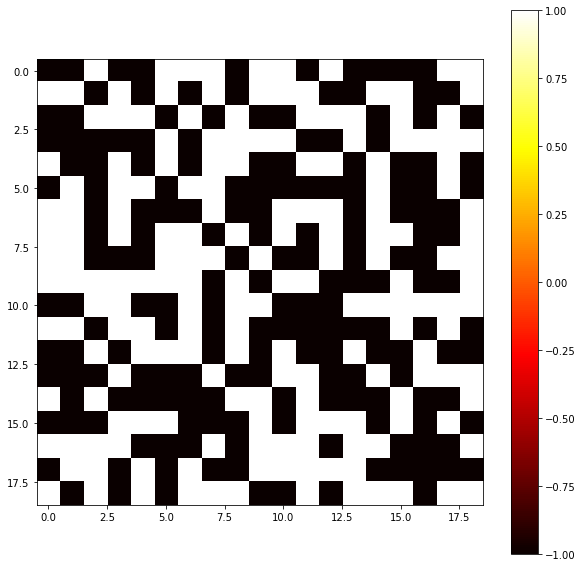

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(arr[1:G,1:G], cmap="hot")
plt.colorbar()
plt.show()

$\textbf{So, what is happening?}$

Here we can see in the saved pictures that sometimes the built up magnetization is positive or sometimes is it negative, it comes from the fact that the process is randomised and +1 and -1 in this case is symmetric. 

Let us say:
The random point that was chosen first was surrounded by positive points, so it got converted to positive if it was negative. This case went on the back of a cascasding effect. Increasing the number of +1's. Somewhere the random picker encountered an area sorrounded by negatives. This again gave rise to conversion of positives into negatives which overpowered the previous action. So, we see periodic fluctuations in the magnetisation. It goes to high positive zone and then goes to highly negative zone. But it settles down in a bias(either positive/negative) in the end. It complete depends upon the environment of the random points that being chosen by the random choosing.


##### Part-E

Text(0.5, 1.0, 'Magentisation Profile Over time')

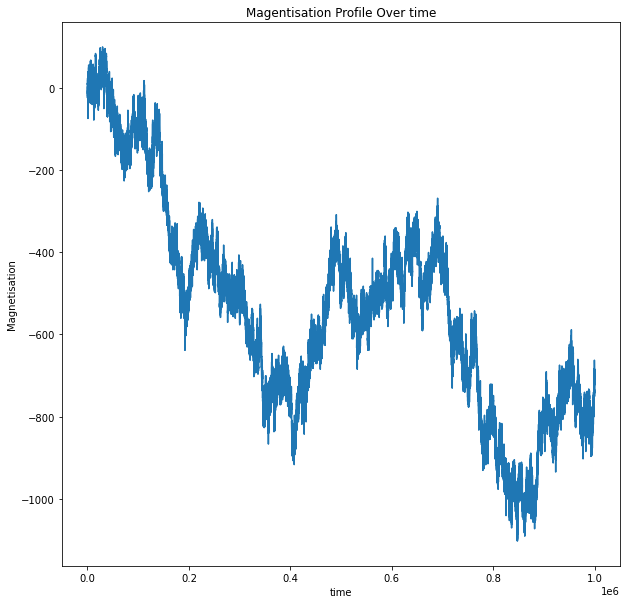

In [104]:
T=2
k_b=1
G=20
J=1
arr=np.zeros([G+1, G+1])
for i in range(1,G):
    for j in range(1,G):
        arr[i][j]=random.choice([-1,1])
M=np.sum(arr)

y=[M]
N=1000000
x=np.arange(0,N+1)
for k in range(N):
    i = np.random.randint(1,G)
    j = np.random.randint(1,G)
    E_int=-arr[i][j]*(arr[i][j-1]+arr[i][j+1]+arr[i-1][j]+arr[i+1][j])
    if(E_int>=0):
        arr[i][j]*=-1
    if(E_int<0):
        beta=1/(k_b*T)
        prob=math.exp(beta*E_int*2)
        sample=int(1/prob)
        ran=unif(0,sample)
        if(ran>=1):
            arr[i][j]*=-1
    M=M+2*arr[i][j]
    y.append(M)
    
y=np.array(y)  


plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("Magnetisation")
plt.title("Magentisation Profile Over time")

Text(0.5, 1.0, 'Magentisation Profile Over time')

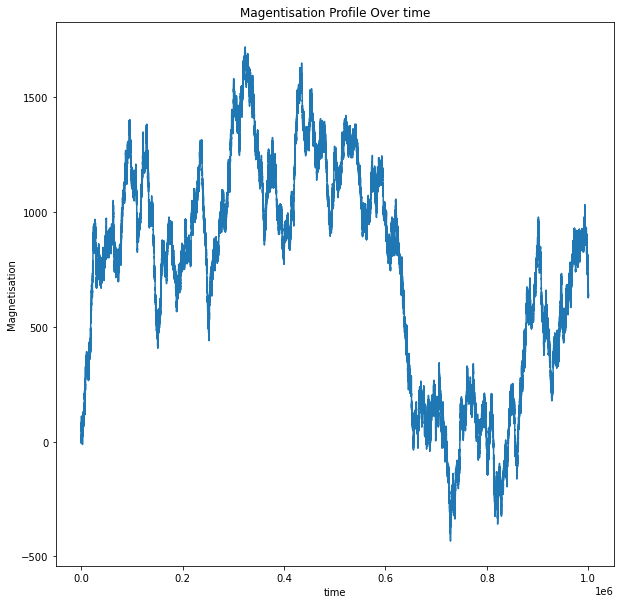

In [105]:
T=3
k_b=1
G=20
J=1
arr=np.zeros([G+1, G+1])
for i in range(1,G):
    for j in range(1,G):
        arr[i][j]=random.choice([-1,1])
M=np.sum(arr)

y=[M]
N=1000000
x=np.arange(0,N+1)
for k in range(N):
    i = np.random.randint(1,G)
    j = np.random.randint(1,G)
    E_int=-arr[i][j]*(arr[i][j-1]+arr[i][j+1]+arr[i-1][j]+arr[i+1][j])
    if(E_int>=0):
        arr[i][j]*=-1
    if(E_int<0):
        beta=1/(k_b*T)
        prob=math.exp(beta*E_int*2)
        sample=int(1/prob)
        ran=unif(0,sample)
        if(ran>=1):
            arr[i][j]*=-1
    M=M+2*arr[i][j]
    y.append(M)
    
y=np.array(y)  


plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("Magnetisation")
plt.title("Magentisation Profile Over time")

Text(0.5, 1.0, 'Magentisation Profile Over time')

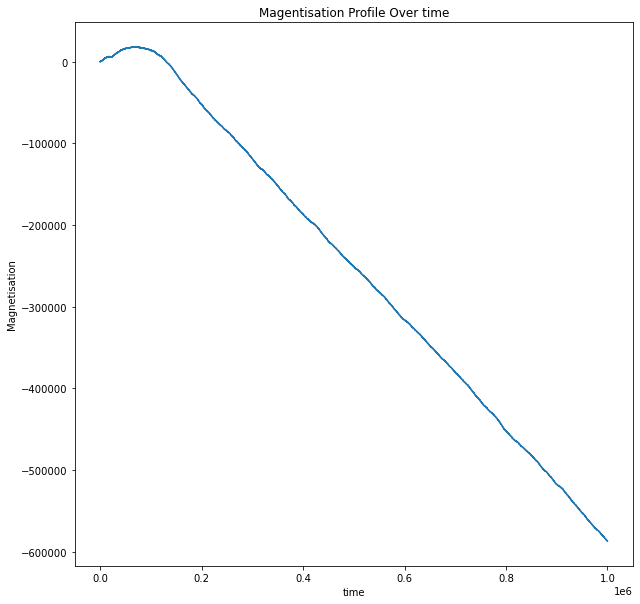

In [10]:
T=10
k_b=1
G=20
J=1
arr=np.zeros([G+1, G+1])
for i in range(1,G):
    for j in range(1,G):
        arr[i][j]=random.choice([-1,1])
M=np.sum(arr)

y=[M]
N=1000000
x=np.arange(0,N+1)
for k in range(N):
    i = np.random.randint(1,G)
    j = np.random.randint(1,G)
    E_int=-arr[i][j]*(arr[i][j-1]+arr[i][j+1]+arr[i-1][j]+arr[i+1][j])
    if(E_int>=0):
        arr[i][j]*=-1
    if(E_int<0):
        beta=1/(k_b*T)
        prob=math.exp(beta*E_int*2)
        sample=int(1/prob)
        ran=unif(0,sample)
        if(ran>=1):
            arr[i][j]*=-1
    M=M+2*arr[i][j]
    y.append(M)
    
y=np.array(y)  


plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.xlabel("time")
plt.ylabel("Magnetisation")
plt.title("Magentisation Profile Over time")

A visible change which is observed is that the rapid fluctuations of the system has decreased a lot as the temperature has been increased. 

The probability of a lower energy state going to a higher energuy state is $e^{-\Delta E/(kT)}$, for T=1, it is significant. The high energy state goes to the low energy state with probability 1. But, the reverse also happens more when the temperature is low. This effectively amounts to more fluctuations. Which is seen in T=1, it has decreased as T has increased.

### Q8

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cmath

In [60]:
#Sampling at random from a Gaussian Distribution

def randGauss(mu, sigma):
    z= np.random.uniform(0,1)
    r=math.sqrt(-2*sigma**2*math.log(1-z))
    theta=np.random.uniform(0, 2*math.pi)
    x=r*math.cos(theta)
    return x+mu


#Defining the Cooling schedule

def ExpoCooling(T_i, T_f, tau, t):
    cool=math.exp(-t/tau)
    return T_i*cool +T_f*(1-cool)    

##### Part-A

In [55]:
def func(x):
    return x**2-math.cos(4*math.pi*x)

tau =0.5
T_i=3
T_f=1e-80
max_count=10000
x=2
k_b=1 #just assuming a self-consistent unit system where k_b is 1
x_plot=[]

for i in range(max_count):
    delta=randGauss(0,1)
    T=ExpoCooling(T_i, T_f, tau, i)
    x_new=x+delta
    if(func(x_new)<func(x)):
        x=x_new
    else:
        diff=func(x+delta)-func(x)
        prob=math.exp(-(diff)/(k_b*T))
        if(prob<=1e-180):
            pass
        else:
            N=int(1/prob)
            y=np.random.uniform(0,N)
            if(y<1):
                x=x_new
    x_plot.append(x)
print(x)


-8.121617579183275e-05


<Figure size 1440x1440 with 0 Axes>

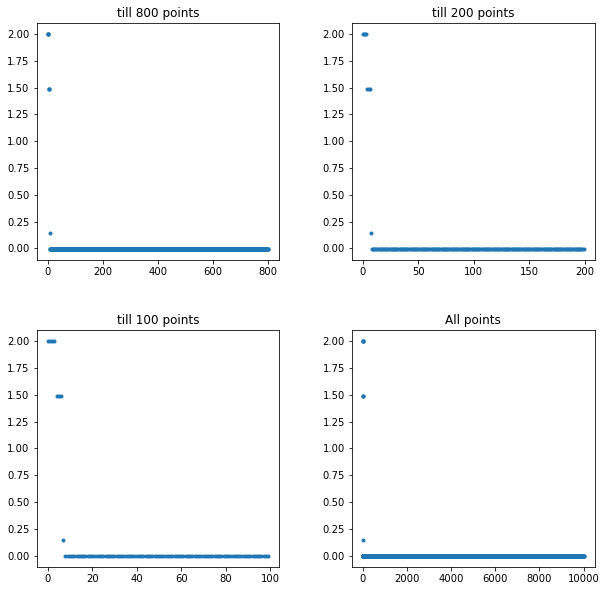

In [56]:
#Plotting some initial points because the solution stabilises long before the counter becomes too big
plt.figure(figsize=(20,20))
fig, axis= plt.subplots(2,2, figsize=(10,10))

axis[0,0].plot(x_plot[:800], ".")
axis[0,0].set_title("till 800 points")
axis[0,1].plot(x_plot[:200], ".")
axis[0,1].set_title("till 200 points")
axis[1,0].plot(x_plot[:100], ".")
axis[1,0].set_title("till 100 points")
axis[1,1].plot(x_plot, ".")
axis[1,1].set_title("All points")


plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()



In this case is it pretty evident that there are sudden fluctuations in the figure, the higher points are first there and then we have random choice of points which yield a lower value fo the energy and the x_new changes to that. At time goes by the temperature drops and transition to higher states become nearly impossible, the state settles at nearly, 0. There can be different answers based on runs. More fluctuations when temperature has alreaduy dropped a lot, is correlated with higher answer in my personal observation.

Part-B

In [94]:
def func1(x):
    return math.cos(x)+math.cos(math.sqrt(2)*x)+math.cos(math.sqrt(3)*x)

tau =500
T_i=2
T_f=1e-80
max_count=100000
x1=np.random.uniform(0,50)
k_b=1 #just assuming a self-consistent unit system where k_b is 1
x1_plot=[]

for i in range(max_count):
    delta=randGauss(0,1)
    T=ExpoCooling(T_i, T_f, tau, i)
    x_new=x1+delta
    if(func1(x_new)<func1(x1)):
        x1=x_new
    else:
        diff=func1(x_new)-func1(x1)
        prob=math.exp(-(diff)/(k_b*T))
        if(prob<=1e-180):
            pass
        else:
            N=int(1/prob)
            y=np.random.uniform(0,N)
            if(y<1):
                x1=x_new
    x1_plot.append(x1)
print(x1)


15.959510736593371


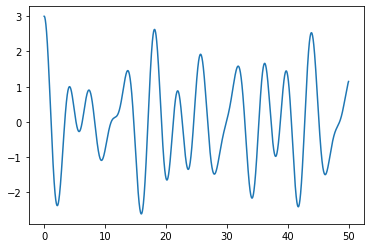

In [93]:
x=np.linspace(0,50,5000)
y=[func1(ele) for ele in x]

plt.plot(x,y)

 

As evident there are too many local minimas, so, the function is often giving answers like 9, 27, 34, 45. Which are not the minima. This is happening because the cooling rate is too high, and the solution is getting stuck once it is hitting a minima.

Increasing the decay time from 5 to 50 makes the solution converge to approximately 15.9595, but sometimes to 41.74 and other minimas were achieved soometimes, although rare. Making the decay time for the cooling rate 500 makes the program converge into the right minima with extremely high probabililty.

The coooling law here is given by:

<b><font color="purple">$$T= T_i e^{-\frac{t}{\tau}}+T_f (1- e^{-\frac{t}{\tau}})$$<font color> <b>

### Q9

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython import display
from matplotlib.animation import FuncAnimation, PillowWriter

In [3]:
#Defining the Cooling schedule

def ExpoCooling(T_i, T_f, tau, t):
    cool=math.exp(-t/tau)
    return T_i*cool +T_f*(1-cool)    

In [ ]:
#Defining the variables:
#T_i: Initial Temperature
#T_f: Final Temperature'
#tau: Cooling rate parameter
#num: Number of dimers
#grid: grid where dimers going to stick
#size: size of the sqaure grid
size=50
T_i=5
T_f=1e-80
tau=500
num=0
num1=0
k_b=1
grid=np.zeros((size, size))
dimer=np.zeros((size, size)) #shows the existence of a polymer

#making the animation
fig=plt.figure()
metadata=dict(title='movie', artist='Sanmit')
move=PillowWriter(fps=15, metadata=metadata)

 #shows the existence of a polymer

max_count=5000

with move.saving(fig, "animation.gif", 100):
for i in range(max_count):
    plt.close()
    j1=np.random.randint(0,50)
    k1=np.random.randint(0,50)
    pos=[]
    if(k1<49):
        pos.append('right')
    if(k1>0):
        pos.append('left')
    if(j1<49):
        pos.append('down')
    if(j1>0):
        pos.append('up')
    L=len(pos)
    p=np.random.randint(0,L)
    if(pos[p]=='right'):
        j2=j1
        k2=k1+1
    if(pos[p]=='left'):
        j2=j1
        k2=k1-1
    if(pos[p]=='down'):
        j2=j1+1
        k2=k1
    if(pos[p]=='up'):
        j2=j1-1
        k2=k1

    val1=grid[j1][k1]
    val2=grid[j2][k2]

    if(val1==val2):
        if(val1==0):
            grid[j1][k1]=num1+1
            grid[j2][k2]=num1+1
            dimer[j1][k1]=1
            dimer[j2][k2]=1
            num+=1
            num1+=1

        else:
            T=ExpoCooling(T_i, T_f, tau, i)
            prob=math.exp(-1/(k_b*T))
            if(prob<1e-180):
                pass
            else:
                N=int(1/prob)
                var=np.random.uniform(0,N)
                if(var<1):
                    grid[j1][k1]=0
                    grid[j2][k2]=0
                    num-=1
                    dimer[j1][k1]=0
                    dimer[j2][k2]=0
    if(i%25==0):
        plt.imshow(dimer)
        move.grab_frame()
        plt.clf()


print(num)


### Q10

 ##### Part-A
 
 The range of $\theta$ is 0 to $\pi$, the range of $\phi$ is 0 to $2\pi$. The probability distributions are normalised:
 
 $$\int_0^\pi \frac{d\theta sin\theta}{2}=-\frac{cos\theta}{2}|_0^\pi = - \frac{-1-1}{2}=1$$
 $$\int_{0}^{2\pi}\frac{d\phi}{2\pi}=\frac{2\pi}{2\pi}=1$$

##### Part-B

$$z_\phi=\int_0^\phi \frac{d\phi}{2\pi}=\frac{\phi}{2\pi} \implies \phi=2\pi z_\phi$$
$$z_\theta=\int_0^\theta \sin\theta/2 = (1-\cos\theta)/2 \implies \theta= \arccos(1-2z_\theta)$$

In [4]:
#part-C
import random
import math
import numpy as np

#theta
z_t=np.random.uniform(0,1)
theta=math.acos(1-2*z_t)

#phi
z_p=np.random.uniform(0,1)
phi=2*math.pi*z_p

print(theta, phi)

2.509338414246135 4.698242206185691


##### Q11

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

Part-A,B

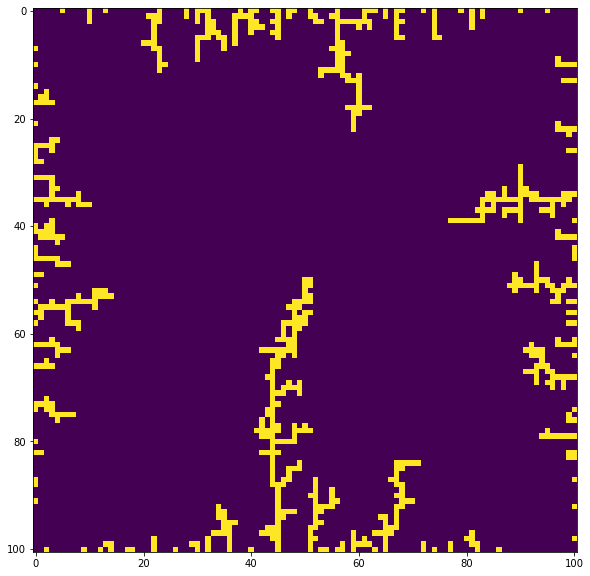

In [8]:
#for 101x101 grid
def diffusion_1(L):
    mid=int((L)/2)
    grid=np.zeros((L,L))
    new_particle=(grid[mid][mid+1] or grid[mid][mid-1] or grid[mid+1][mid] or grid[mid-1][mid])
    max_count=1000
    k=0
    i=mid
    j=mid
    terminate=0
    while(terminate==0):
        stop=0
        i=mid
        j=mid
        while(stop==0):
            p=np.random.randint(0,4)
            if(p==0):
                i+=1
            if(p==1):
                i-=1
            if(p==2):
                j+=1
            if(p==3):
                j-=1
            if(i==0 or i==L-1 or j==0 or j==L-1 or grid[i][j+1]==1 or grid[i][j-1]==1 or grid[i-1][j]==1 or grid[i+1][j]==1):
                grid[i][j]=1
                stop=1
        if(i==mid and j==mid):
            terminate=1
        k+=1
    return grid

L=101
x = diffusion_1(L)
plt.figure(figsize=(10,10))
plt.imshow(x)
            

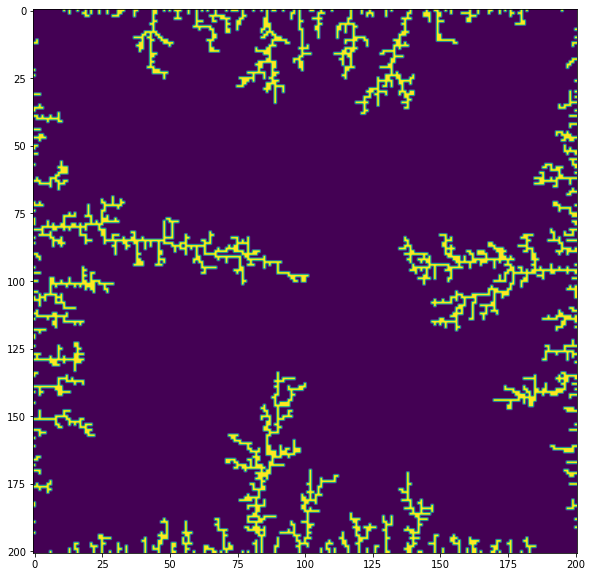

In [9]:
#for 201x201 grid
def diffusion_1(L):
    mid=int((L)/2)
    grid=np.zeros((L,L))
    new_particle=(grid[mid][mid+1] or grid[mid][mid-1] or grid[mid+1][mid] or grid[mid-1][mid])
    max_count=1000
    k=0
    i=mid
    j=mid
    terminate=0
    while(terminate==0):
        stop=0
        i=mid
        j=mid
        while(stop==0):
            p=np.random.randint(0,4)
            if(p==0):
                i+=1
            if(p==1):
                i-=1
            if(p==2):
                j+=1
            if(p==3):
                j-=1
            if(i==0 or i==L-1 or j==0 or j==L-1 or grid[i][j+1]==1 or grid[i][j-1]==1 or grid[i-1][j]==1 or grid[i+1][j]==1):
                grid[i][j]=1
                stop=1
        if(i==mid and j==mid):
            terminate=1
        k+=1
    return grid

L=201
x = diffusion_1(L)
plt.figure(figsize=(10,10))
plt.imshow(x)
            

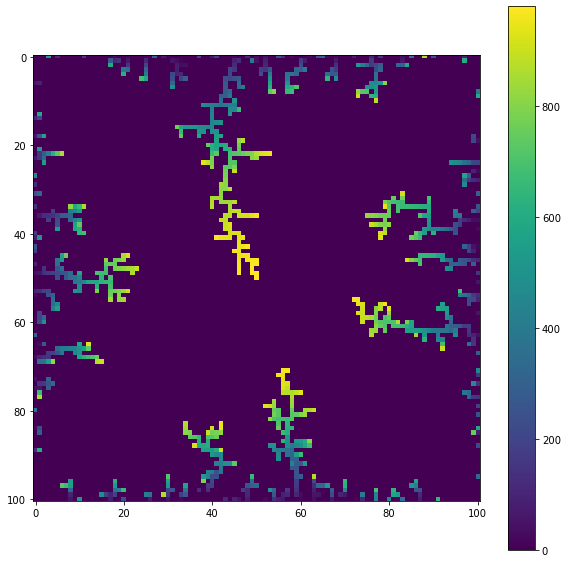

In [5]:
#with colour variation
def diffusion_1(L):
    mid=int((L)/2)
    grid=np.zeros((L,L))
    new_particle=(grid[mid][mid+1] or grid[mid][mid-1] or grid[mid+1][mid] or grid[mid-1][mid])
    max_count=1000
    k=1
    i=mid
    j=mid
    terminate=0
    while(terminate==0):
        stop=0
        i=mid
        j=mid
        while(stop==0):
            p=np.random.randint(0,4)
            if(p==0):
                i+=1
            if(p==1):
                i-=1
            if(p==2):
                j+=1
            if(p==3):
                j-=1
            if(i==0 or i==L-1 or j==0 or j==L-1 or grid[i][j+1]!=0 or grid[i][j-1]!=0 or grid[i-1][j]!=0 or grid[i+1][j]!=0):
                grid[i][j]=k
                stop=1
        if(i==mid and j==mid):
            terminate=1
        k+=1
    return grid

L=101
x = diffusion_1(L)
plt.figure(figsize=(10,10))
plt.imshow(x)
plt.colorbar()
            

Part-C

In [ ]:
#choosing a random particle
def boundary(L):
    p=np.random.randint(0, 4*L-4)
    if(p<L):
        i=0
        j=p
    if(p>=L and p<2*L-1):
        j=L-1
        i=p-L
    if(p>=2*L-1 and p<3*L-2):
        i=L-1
        j=3*L-3-p
    if(p>=3*L-2):
        j=0
        i=4*L-4-p
    return i,j

def diffusion_2(L):
    grid=np.zeros((L,L))
    #setting the middle anchored particle
    mid=int(L/2)
    grid[mid][mid]=1
    r=0
    half=int(mid/2)
    while(r<half):
        #initialise position of random particle
        theta=np.random.uniform(-math.pi, math.pi)
        i=mid+int(r*math.cos(theta))
        j=mid+int(r*math.sin(theta))
        stop=(grid[i][j+1]!=0 or grid[i][j-1]!=0 or grid[i-1][j]!=0 or grid[i+1][j]!=0)
        if(stop!=0):
            r+=1
            pass
        else: #start evolution
            while(stop==0):
                p=np.random.randint(0,4)
                if(p==0):
                    i+=1
                if(p==1):
                    i-=1
                if(p==2):
                    j+=1
                if(p==3):
                    j-=1
                if(math.sqrt((i-mid)**2+(j-mid)**2)>2*r):
                    break
                if(grid[i][j+1]!=0 or grid[i][j-1]!=0 or grid[i-1][j]!=0 or grid[i+1][j]!=0):
                    stop=1
                    r+=1
                    break
    return grid
                
        
    
L=101
grid1=(diffusion_2(L))
plt.fig(figure=(10,10))
plt.imshow(grid1)
                
                

-1
